In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import boxcox1p
from sklearn import preprocessing

plt.style.use('ggplot')

In [2]:
# Read data
feature_CZ = pd.read_csv("feature_CZ_fillna_scale.csv")
feature_JK = pd.read_csv("feature_JK_fillna_scale.csv")
feature_JJC = pd.read_csv("feature_JJC_fillna_scale2.csv")
feature_HYJ = pd.read_csv("feature_HYJ_fillna_scale.csv")

In [3]:
# Create empty data frame for data collection
feature_fillna = pd.DataFrame()
feature_fillna["Id"] = feature_HYJ["Id"]
feature_fillna["source"] = feature_HYJ["source"]
feature_fillna["SalePrice"] = feature_HYJ["SalePrice"]

In [4]:
# Drop "Id", "source", and "SalePrice" for every orginal feature data
column_drop = ["Id", "source", "SalePrice"]

feature_CZ = feature_CZ.drop(column_drop, axis = 1)
feature_JK = feature_JK.drop(column_drop, axis = 1)
feature_JJC = feature_JJC.drop(column_drop, axis = 1)
feature_HYJ = feature_HYJ.drop(column_drop, axis = 1)

In [5]:
# Join features
feature_fillna = feature_fillna.join(feature_CZ)
feature_fillna = feature_fillna.join(feature_JK)
feature_fillna = feature_fillna.join(feature_JJC)
feature_fillna = feature_fillna.join(feature_HYJ)

In [6]:
feature_fillna.columns

Index([u'Id', u'source', u'SalePrice', u'Heating', u'HeatingQC', u'HouseStyle',
       u'KitchenAbvGr', u'KitchenQual', u'LandContour', u'LandSlope',
       u'LotArea', u'LotConfig', u'LotFrontage', u'LotShape', u'LowQualFinSF',
       u'MSSubClass', u'MSZoning', u'MasVnrArea', u'MasVnrType',
       u'MiscFeature', u'MiscVal', u'MoSold', u'Neighborhood', u'ExterCond',
       u'ExterQual', u'Exterior1st', u'Exterior2nd', u'Fence', u'FireplaceQu',
       u'Fireplaces', u'Foundation', u'Functional', u'GarageArea',
       u'GarageFinish', u'GarageQual', u'GarageType', u'GarageYrBlt',
       u'GrLivArea', u'Bath', u'1stFlrSF', u'2ndFlrSF', u'3SsnPorch', u'Alley',
       u'BedroomAbvGr', u'BldgType', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtFinType1', u'BsmtFinType2',
       u'BsmtFullBath', u'BsmtHalfBath', u'BsmtQual', u'BsmtUnfSF',
       u'CentralAir', u'Condition1', u'Condition2', u'Electrical',
       u'OpenPorchSF', u'OverallCond', u'OverallQual', u'Pav

In [7]:
feature_fillna.to_csv("feature_fillna_scale.csv", index = False)

In [8]:
# Covert "PavedDrive" from categorical to ordinal 
map_PavedDrive = {"Y":2, "P":1, "N":0}
feature_fillna["PavedDrive"] = [map_PavedDrive[x] for x in feature_fillna["PavedDrive"]]

In [9]:
#Check remaining missing values if any
all_data = feature_fillna
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


In [10]:
# Save data
feature_fillna.to_csv("feature_fillna_scale.csv", index = False)

In [11]:
feature_fillna["Alley"] = feature_fillna["Alley"].fillna("None")
feature_fillna["BsmtFinSF2"] = feature_fillna["BsmtFinSF2"].fillna(0)

# MasVnrArea

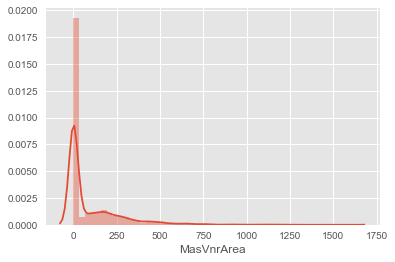

In [12]:
# MasVnrArea
feature = "MasVnrArea"
# Check the distribution 
sns.distplot(feature_fillna[feature])

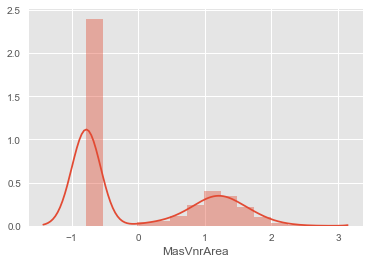

In [13]:
# Box-cox transform
lam = 0.15
feature_fillna[feature] = preprocessing.scale(boxcox1p(feature_fillna[feature], lam))

# Check the new distribution
sns.distplot(feature_fillna[feature]) # Doesn't work

# MiscVal

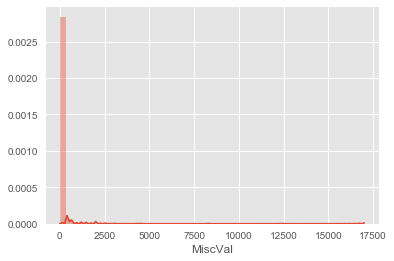

In [14]:
# MasVnrArea
feature = "MiscVal"
# Check the distribution 
sns.distplot(feature_fillna[feature])

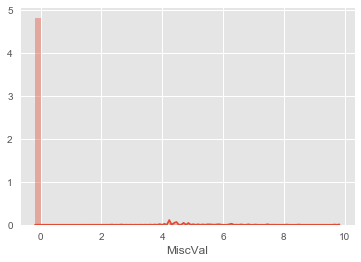

In [15]:
# Box-cox transform
lam = 0.15
feature_fillna[feature] = preprocessing.scale(boxcox1p(feature_fillna[feature], lam))

# Check the new distribution
sns.distplot(feature_fillna[feature]) # Doesn't work

In [16]:
# Month sold and MSSubClass are transformed into categorical features
feature_fillna["MoSold"] = feature_fillna["MoSold"].apply(int)
feature_fillna["MoSold"] = feature_fillna["MoSold"].apply(str)
feature_fillna["MSSubClass"] = feature_fillna["MSSubClass"].apply(str)

# Some datatype of numerical features are mistaken as str
feature_fillna["LotFrontage"] = feature_fillna["LotFrontage"].apply(float)
feature_fillna["LowQualFinSF"] = feature_fillna["LowQualFinSF"].apply(float)
feature_fillna["BsmtFinSF1"] = feature_fillna["BsmtFinSF1"].apply(float)
feature_fillna["BsmtFullBath"] = feature_fillna["BsmtFullBath"].apply(float)
feature_fillna["BsmtHalfBath"] = feature_fillna["BsmtHalfBath"].apply(float)
feature_fillna["BsmtUnfSF"] = feature_fillna["BsmtUnfSF"].apply(float)

In [17]:
# Original number of columns
len(feature_fillna.columns)

77

In [18]:
# One-hot method
source = feature_fillna["source"]
feature_fillna = feature_fillna.drop("source", axis = 1)
feature_fillna = pd.get_dummies(feature_fillna)
feature_fillna["source"] = source
len(feature_fillna.columns)

252

In [19]:
feature_fillna.to_csv("feature_fillna_scaled_onehot.csv", index = False)